<a href="https://colab.research.google.com/github/prasvijaya/datascienceportfolio/blob/master/AML_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> AML Detector </h1>

<h2> AML </h2>

In this kernel we will use various predictive models to see how accurate they  are in detecting whether a transaction is a normal payment or a fraud

<h3> Summary: </h3>
<ul>
<li>Three Datasets are given to perform analysis. Accounts, Alerts, Transactions. 
<li> Accounts Dataset contains the information about the Basic Account information. </li>
 <li> Alerts Dataset contains the information about the detailed alert information with various Alert IDs. </li>   
<li> Transactions Dataset contains information about each and every transaction originated from Sender Account ID over the period of time . </li>
</ul>

In [ ]:
#Import necessary modules

#data processing package
import pandas as pd

#linear algebra package
import numpy as np

#visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
#necessary Scikit-learn modules

#necessary scikit learn libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold,ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

### Read all the csv files

In [ ]:
#import accounts dataset
accounts= pd.read_csv(r'/Users/prasanna/Desktop/AML Data/accounts.csv')
accounts.head()

,ACCOUNT_ID,CUSTOMER_ID,INIT_BALANCE,COUNTRY,ACCOUNT_TYPE,IS_FRAUD,TX_BEHAVIOR_ID
0,0,C_0,184.44,US,I,False,1
1,1,C_1,175.80,US,I,False,1
2,2,C_2,142.06,US,I,False,1
3,3,C_3,125.89,US,I,False,1
4,4,C_4,151.13,US,I,False,1


In [ ]:
#Understanding accounts dataset
print(accounts.shape)

accounts.info()

(10000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ACCOUNT_ID      10000 non-null  int64  
 1   CUSTOMER_ID     10000 non-null  object 
 2   INIT_BALANCE    10000 non-null  float64
 3   COUNTRY         10000 non-null  object 
 4   ACCOUNT_TYPE    10000 non-null  object 
 5   IS_FRAUD        10000 non-null  bool   
 6   TX_BEHAVIOR_ID  10000 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 478.6+ KB


Our initial understanding is that our accounts dataset have 10000 observation spread across in 7 features/columns. IS_FRAUD could be our target/known label to learn and predict using ML algorithm.

In [ ]:
# Let's get unique values for each category
unique_vals = {
    k: accounts[k].unique()
    for k in accounts.columns
}

unique_vals

{'ACCOUNT_ID': array([   0,    1,    2, ..., 9997, 9998, 9999]),
 'CUSTOMER_ID': array(['C_0', 'C_1', 'C_2', ..., 'C_9997', 'C_9998', 'C_9999'],
       dtype=object),
 'INIT_BALANCE': array([184.44, 175.8 , 142.06, ..., 260.85, 323.79, 317.65]),
 'COUNTRY': array(['US'], dtype=object),
 'ACCOUNT_TYPE': array(['I'], dtype=object),
 'IS_FRAUD': array([False,  True]),
 'TX_BEHAVIOR_ID': array([1, 2, 3, 4, 5])}

    ACCOUNT_ID has unique account value given to Account Holders. CUSTOMER_ID is nothing but the ACCOUNT_ID prefixed with 'C_'.
    INIT_BALANCE is a float type columns contains account balance in numericals
    COUNTRY, ACCOUNT_TYPE holds only one value in entire dataset
    IS_FRAUD column is of Bool datatype contains value of TRUE or FALSE
    TX_BEHAVIOR_ID is integer column contains value of 1,2,3,4,5

In [ ]:
accounts['IS_FRAUD'].value_counts()

False    8315
True     1685
Name: IS_FRAUD, dtype: int64

IS_FRAUD is our target label to predict whether the said transaction is fraudulent or non-fraudulent is our objective. Since, we know our target label, we are implementing Supervised Learning ML algorithm to predict.
Before all these, we need to explore other datasets as well

In [ ]:
#import alerts dataset
alerts= pd.read_csv(r'/Users/prasanna/Desktop/AML Data/alerts.csv')
alerts.head()

,ALERT_ID,ALERT_TYPE,IS_FRAUD,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP
0,193,fan_in,True,82,6976,9739,TRANSFER,4.85,0
1,377,cycle,True,949,5776,2570,TRANSFER,10.27,0
2,189,fan_in,True,6280,9999,9530,TRANSFER,2.74,1
3,377,cycle,True,7999,1089,7352,TRANSFER,10.27,1
4,130,fan_in,True,12975,7025,9708,TRANSFER,3.53,2


In [ ]:
#Understanding alerts dataset
print(alerts.shape)

alerts.info()

(1719, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALERT_ID             1719 non-null   int64  
 1   ALERT_TYPE           1719 non-null   object 
 2   IS_FRAUD             1719 non-null   bool   
 3   TX_ID                1719 non-null   int64  
 4   SENDER_ACCOUNT_ID    1719 non-null   int64  
 5   RECEIVER_ACCOUNT_ID  1719 non-null   int64  
 6   TX_TYPE              1719 non-null   object 
 7   TX_AMOUNT            1719 non-null   float64
 8   TIMESTAMP            1719 non-null   int64  
dtypes: bool(1), float64(1), int64(5), object(2)
memory usage: 109.2+ KB


Our initial understanding is that our alerts dataset have 1719 observation spread across in 8 features/columns. IS_FRAUD could be our target/known label to learn and predict using ML algorithm.

In [ ]:
# Let's get unique values for each category
unique_vals = {
    k: alerts[k].unique()
    for k in alerts.columns
}

unique_vals

{'ALERT_ID': array([193, 377, 189, 130, 183, 267, 176, 170,   8, 202, 260, 346, 115,
        374, 317,  41, 179,  39,  61,  32,  14, 323, 174, 166, 356, 100,
        242,  88, 363,  68, 138, 145, 330, 302, 387, 351,  79, 322, 134,
        326, 342,  66, 339, 258,  82,  75, 192, 241, 350, 284, 268, 369,
        150, 239, 380, 257, 123,  25, 252,  59, 190, 282, 313, 151,  87,
        365, 329, 214,  73,   1, 230, 210, 386,  54, 299, 102, 160, 114,
         20,  43, 295,  24, 185, 249, 296,  37, 218, 235, 216, 291, 336,
        196, 245,  97, 237, 389, 248,  91,  42, 318, 273, 304, 111, 355,
        132, 398, 104, 259, 379, 213, 340, 327,  52, 315,  40, 225, 122,
         58, 357,  30, 343, 233, 352, 382, 121, 359, 226, 393, 238, 141,
        396, 286,  10, 376, 178, 362, 131,  51, 246,  12, 142, 287, 147,
         48,  78, 103, 109, 278, 305,  96, 149,  55, 154,  83, 310,  29,
        269, 117, 277, 112,  89, 227,  22, 275,  81,  57, 345, 129, 152,
        319, 181, 347, 146,  84, 331, 2

    ALERT_ID contains the alert code generated on each transaction to Account Holders. 
    ALERT_TYPE contains two values fan_in and cycle.
    IS_FRAUD contains only TRUE value in alerts dataset
    TX_ID is the unique id generated on each transactions
    SENDER_ACCOUNT_ID is account id where the transaction is initiated. account id are in the range from 0-9999
    RECEIVER_ACCOUNT_ID is account id to which the transaction is made. account id are in the range from 0-9999
    TX_TYPE holds only one value in entire dataset
    TX_AMOUNT is a float type column about the amount in numericals
    TIMESTAMP holds the value of date that the transaction is made.

In [ ]:
alerts['IS_FRAUD'].value_counts()

True    1719
Name: IS_FRAUD, dtype: int64

IS_FRAUD our target column only contains TRUE value in alerts dataset

In [ ]:
#import transactions dataset
transactions= pd.read_csv(r'/Users/prasanna/Desktop/AML Data/transactions.csv')
transactions.head()

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID
0,1,6456,9069,TRANSFER,465.05,0,False,-1
1,2,7516,9543,TRANSFER,564.64,0,False,-1
2,3,2445,9356,TRANSFER,598.94,0,False,-1
3,4,2576,4617,TRANSFER,466.07,0,False,-1
4,5,3524,1773,TRANSFER,405.63,0,False,-1


In [ ]:
#Understanding transactions dataset
print(transactions.shape)

transactions.info()

(1323234, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323234 entries, 0 to 1323233
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   TX_ID                1323234 non-null  int64  
 1   SENDER_ACCOUNT_ID    1323234 non-null  int64  
 2   RECEIVER_ACCOUNT_ID  1323234 non-null  int64  
 3   TX_TYPE              1323234 non-null  object 
 4   TX_AMOUNT            1323234 non-null  float64
 5   TIMESTAMP            1323234 non-null  int64  
 6   IS_FRAUD             1323234 non-null  bool   
 7   ALERT_ID             1323234 non-null  int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 71.9+ MB


In [ ]:
transactions.nunique()

TX_ID                  1323234
SENDER_ACCOUNT_ID         9999
RECEIVER_ACCOUNT_ID       9926
TX_TYPE                      1
TX_AMOUNT                43748
TIMESTAMP                  200
IS_FRAUD                     2
ALERT_ID                   392
dtype: int64

In [ ]:
transactions['IS_FRAUD'].value_counts()

False    1321515
True        1719
Name: IS_FRAUD, dtype: int64

    TX_ID is the unique id generated on each transactions
    SENDER_ACCOUNT_ID is account id where the transaction is initiated. account id are in the range from 0-9999
    RECEIVER_ACCOUNT_ID is account id to which the transaction is made. account id are in the range from 0-9999
    TX_TYPE holds only one value in entire dataset
    TX_AMOUNT is a float type column about the amount in numericals
    TIMESTAMP holds the value of date that the transaction is made.
    IS_FRAUD column is of Bool datatype contains value of TRUE or FALSE
    ALERT_ID contains the alert code generated on each transaction to Account Holders.

In [ ]:
#lets understand the ACCOUNT_ID and SENDER_ACCOUNT_ID
print(accounts.ACCOUNT_ID.min(), accounts.ACCOUNT_ID.max(), transactions.SENDER_ACCOUNT_ID.min(), transactions.SENDER_ACCOUNT_ID.max())

0 9999 1 9999


##### Account_ID column in Accounts Dataframe and Sender_Account_ID, Receiver_Account_ID will almost have same range of Values. So, it is understood that Sender is transfering the amount within 9999 accounts. so, We use Account_ID and SENDER_ACCOUNT_ID as matching column to merge the accounts and transactions dataframe.

In [ ]:
merge1= accounts.merge(transactions, left_on= ['ACCOUNT_ID', 'IS_FRAUD'], right_on= ['SENDER_ACCOUNT_ID', 'IS_FRAUD'], how= 'outer')
merge1.head()

,ACCOUNT_ID,CUSTOMER_ID,INIT_BALANCE,COUNTRY,ACCOUNT_TYPE,IS_FRAUD,TX_BEHAVIOR_ID,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,ALERT_ID
0,0.0,C_0,184.44,US,I,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,C_1,175.80,US,I,False,1.0,40545.0,1.0,884.0,TRANSFER,175.8,6.0,-1.0
2,1.0,C_1,175.80,US,I,False,1.0,120410.0,1.0,884.0,TRANSFER,175.8,19.0,-1.0
3,1.0,C_1,175.80,US,I,False,1.0,252101.0,1.0,884.0,TRANSFER,175.8,38.0,-1.0
4,1.0,C_1,175.80,US,I,False,1.0,315679.0,1.0,884.0,TRANSFER,175.8,48.0,-1.0


In [ ]:
#Understanding alerts dataset
print(merge1.shape)

merge1.info()

(1323436, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323436 entries, 0 to 1323435
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ACCOUNT_ID           1047129 non-null  float64
 1   CUSTOMER_ID          1047129 non-null  object 
 2   INIT_BALANCE         1047129 non-null  float64
 3   COUNTRY              1047129 non-null  object 
 4   ACCOUNT_TYPE         1047129 non-null  object 
 5   IS_FRAUD             1323436 non-null  bool   
 6   TX_BEHAVIOR_ID       1047129 non-null  float64
 7   TX_ID                1323234 non-null  float64
 8   SENDER_ACCOUNT_ID    1323234 non-null  float64
 9   RECEIVER_ACCOUNT_ID  1323234 non-null  float64
 10  TX_TYPE              1323234 non-null  object 
 11  TX_AMOUNT            1323234 non-null  float64
 12  TIMESTAMP            1323234 non-null  float64
 13  ALERT_ID             1323234 non-null  float64
dtypes: bool(1), float64(9), object(4)
me

merge1 dataframe have 1323436 observation with 14 columns.

In [ ]:
merge1.groupby('IS_FRAUD')['ALERT_ID'].value_counts()

IS_FRAUD  ALERT_ID
False     -1.0        1321515
True       200.0            5
           201.0            5
           202.0            5
           203.0            5
                       ...   
           321.0            2
           381.0            2
           44.0             1
           231.0            1
           272.0            1
Name: ALERT_ID, Length: 392, dtype: int64

Grouping the IS_FRAUD feature with ALERT_ID, we came to know that transactions with ALERT_ID not equal to -1 are marked as fraudulent transactions

In [ ]:
#Checking the missing values in merge1 dataframe
merge1.isnull().sum()

ACCOUNT_ID             276307
CUSTOMER_ID            276307
INIT_BALANCE           276307
COUNTRY                276307
ACCOUNT_TYPE           276307
IS_FRAUD                    0
TX_BEHAVIOR_ID         276307
TX_ID                     202
SENDER_ACCOUNT_ID         202
RECEIVER_ACCOUNT_ID       202
TX_TYPE                   202
TX_AMOUNT                 202
TIMESTAMP                 202
ALERT_ID                  202
dtype: int64

In [ ]:
# Let's get unique values for each category
unique_vals = {
    k: merge1[k].unique()
    for k in merge1.columns
}

unique_vals

{'ACCOUNT_ID': array([0.000e+00, 1.000e+00, 2.000e+00, ..., 9.998e+03, 9.999e+03,
              nan]),
 'CUSTOMER_ID': array(['C_0', 'C_1', 'C_2', ..., 'C_9998', 'C_9999', nan], dtype=object),
 'INIT_BALANCE': array([184.44, 175.8 , 142.06, ..., 323.79, 317.65,    nan]),
 'COUNTRY': array(['US', nan], dtype=object),
 'ACCOUNT_TYPE': array(['I', nan], dtype=object),
 'IS_FRAUD': array([False,  True]),
 'TX_BEHAVIOR_ID': array([ 1.,  2.,  3.,  4.,  5., nan]),
 'TX_ID': array([     nan,   40545.,  120410., ..., 1131403., 1205770., 1259107.]),
 'SENDER_ACCOUNT_ID': array([      nan, 1.000e+00, 2.000e+00, ..., 8.380e+03, 9.263e+03,
        6.979e+03]),
 'RECEIVER_ACCOUNT_ID': array([  nan,  884., 9356., ..., 2444.,  944., 1471.]),
 'TX_TYPE': array([nan, 'TRANSFER'], dtype=object),
 'TX_AMOUNT': array([           nan, 1.75800000e+02, 1.42050000e+02, ...,
        1.10758112e+06, 4.35860600e+06, 1.37420560e+07]),
 'TIMESTAMP': array([ nan,   6.,  19.,  38.,  48.,  55.,  66.,  67.,  76.,  98.,

In [ ]:
print(merge1.SENDER_ACCOUNT_ID.min(), merge1.SENDER_ACCOUNT_ID.max(), merge1.RECEIVER_ACCOUNT_ID.min(), merge1.RECEIVER_ACCOUNT_ID.max())

1.0 9999.0 3.0 9999.0


We use Account_ID and SENDER_ACCOUNT_ID as matching column to merge the merge1 and Alerts dataframe.

In [ ]:
final= merge1.merge(alerts, on= ['SENDER_ACCOUNT_ID', 'RECEIVER_ACCOUNT_ID', 'IS_FRAUD', 'ALERT_ID', 'TX_ID', 'TX_TYPE', 
                                'TX_AMOUNT', 'TIMESTAMP'], how= 'outer')

final.head()

,ACCOUNT_ID,CUSTOMER_ID,INIT_BALANCE,COUNTRY,ACCOUNT_TYPE,IS_FRAUD,TX_BEHAVIOR_ID,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,ALERT_ID,ALERT_TYPE
0,0.0,C_0,184.44,US,I,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,C_1,175.80,US,I,False,1.0,40545.0,1.0,884.0,TRANSFER,175.8,6.0,-1.0,NaN
2,1.0,C_1,175.80,US,I,False,1.0,120410.0,1.0,884.0,TRANSFER,175.8,19.0,-1.0,NaN
3,1.0,C_1,175.80,US,I,False,1.0,252101.0,1.0,884.0,TRANSFER,175.8,38.0,-1.0,NaN
4,1.0,C_1,175.80,US,I,False,1.0,315679.0,1.0,884.0,TRANSFER,175.8,48.0,-1.0,NaN


In [ ]:
print(final.shape)

final.info()

(1323436, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323436 entries, 0 to 1323435
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ACCOUNT_ID           1047129 non-null  float64
 1   CUSTOMER_ID          1047129 non-null  object 
 2   INIT_BALANCE         1047129 non-null  float64
 3   COUNTRY              1047129 non-null  object 
 4   ACCOUNT_TYPE         1047129 non-null  object 
 5   IS_FRAUD             1323436 non-null  bool   
 6   TX_BEHAVIOR_ID       1047129 non-null  float64
 7   TX_ID                1323234 non-null  float64
 8   SENDER_ACCOUNT_ID    1323234 non-null  float64
 9   RECEIVER_ACCOUNT_ID  1323234 non-null  float64
 10  TX_TYPE              1323234 non-null  object 
 11  TX_AMOUNT            1323234 non-null  float64
 12  TIMESTAMP            1323234 non-null  float64
 13  ALERT_ID             1323234 non-null  float64
 14  ALERT_TYPE           1719 non-null  

In [ ]:
# Let's get unique values for each category
unique_vals = {
    k: final[k].unique()
    for k in final.columns
}

unique_vals

{'ACCOUNT_ID': array([0.000e+00, 1.000e+00, 2.000e+00, ..., 9.998e+03, 9.999e+03,
              nan]),
 'CUSTOMER_ID': array(['C_0', 'C_1', 'C_2', ..., 'C_9998', 'C_9999', nan], dtype=object),
 'INIT_BALANCE': array([184.44, 175.8 , 142.06, ..., 323.79, 317.65,    nan]),
 'COUNTRY': array(['US', nan], dtype=object),
 'ACCOUNT_TYPE': array(['I', nan], dtype=object),
 'IS_FRAUD': array([False,  True]),
 'TX_BEHAVIOR_ID': array([ 1.,  3.,  4.,  5.,  2., nan]),
 'TX_ID': array([     nan,   40545.,  120410., ..., 1131403., 1205770., 1259107.]),
 'SENDER_ACCOUNT_ID': array([      nan, 1.000e+00, 2.000e+00, ..., 8.380e+03, 9.263e+03,
        6.979e+03]),
 'RECEIVER_ACCOUNT_ID': array([  nan,  884., 9356., ..., 2444.,  944., 1471.]),
 'TX_TYPE': array([nan, 'TRANSFER'], dtype=object),
 'TX_AMOUNT': array([           nan, 1.75800000e+02, 1.42050000e+02, ...,
        1.10758112e+06, 4.35860600e+06, 1.37420560e+07]),
 'TIMESTAMP': array([ nan,   6.,  19.,  38.,  48.,  55.,  66.,  67.,  76.,  98.,

In [ ]:
final.groupby('IS_FRAUD')['ALERT_ID'].value_counts()

IS_FRAUD  ALERT_ID
False     -1.0        1321515
True       200.0            5
           201.0            5
           202.0            5
           203.0            5
                       ...   
           321.0            2
           381.0            2
           44.0             1
           231.0            1
           272.0            1
Name: ALERT_ID, Length: 392, dtype: int64

In [ ]:
final['IS_FRAUD'].value_counts()

False    1321516
True        1920
Name: IS_FRAUD, dtype: int64

Our Target Class is imbalanced distribution as Positive class is lesser than negative class

## Data Preprocessing and Cleaning

In [ ]:
#find our number of missing values in Dataframe
final.isnull().sum()

ACCOUNT_ID              276307
CUSTOMER_ID             276307
INIT_BALANCE            276307
COUNTRY                 276307
ACCOUNT_TYPE            276307
IS_FRAUD                     0
TX_BEHAVIOR_ID          276307
TX_ID                      202
SENDER_ACCOUNT_ID          202
RECEIVER_ACCOUNT_ID        202
TX_TYPE                    202
TX_AMOUNT                  202
TIMESTAMP                  202
ALERT_ID                   202
ALERT_TYPE             1321717
dtype: int64

In [ ]:
#returns only those rows having missing data
missing_values= final[final.isnull().any(axis=1)]
missing_values

,ACCOUNT_ID,CUSTOMER_ID,INIT_BALANCE,COUNTRY,ACCOUNT_TYPE,IS_FRAUD,TX_BEHAVIOR_ID,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,ALERT_ID,ALERT_TYPE
0,0.0,C_0,184.44,US,I,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,C_1,175.80,US,I,False,1.0,40545.0,1.0,884.0,TRANSFER,175.80,6.0,-1.0,NaN
2,1.0,C_1,175.80,US,I,False,1.0,120410.0,1.0,884.0,TRANSFER,175.80,19.0,-1.0,NaN
3,1.0,C_1,175.80,US,I,False,1.0,252101.0,1.0,884.0,TRANSFER,175.80,38.0,-1.0,NaN
4,1.0,C_1,175.80,US,I,False,1.0,315679.0,1.0,884.0,TRANSFER,175.80,48.0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323431,NaN,NaN,NaN,NaN,NaN,False,NaN,790916.0,8252.0,9571.0,TRANSFER,1107581.12,120.0,-1.0,NaN
1323432,NaN,NaN,NaN,NaN,NaN,False,NaN,943847.0,8252.0,9186.0,TRANSFER,4358606.00,142.0,-1.0,NaN
1323433,NaN,NaN,NaN,NaN,NaN,False,NaN,1131403.0,8252.0,8087.0,TRANSFER,13742056.00,171.0,-1.0,NaN
1323434,NaN,NaN,NaN,NaN,NaN,False,NaN,1205770.0,8252.0,3904.0,TRANSFER,21474836.47,182.0,-1.0,NaN


    ACCOUNT_ID, CUSTOMER_ID, INIT_BALANCE, COUNTRY, ACCOUNT_TYPE, IX_BEHAVIOR_ID, ALERT_TYPE have lots of missing values present in the final dataset
    TX-ID, SENDER_ACCOUNT_ID, RECEIVER_ACCOUNT_ID, TX_TYPE, TX_AMOUNT, TIMESTAMP, ALERT_ID have lesser of missing values.
    
    Filling these columns with statistical or most frequent values will create a bias while training our model

### Observations for Data Cleaning

   * ACCOUNT_ID and SENDER_ACCOUNT_ID contains similar values, we can remove one of the Column.
   * CUSTOMER_ID is nothing but ACCOUNT_ID prefixed with C_. so, we can remove this column as well
   * COUNTRY, ACCOUNT_TYPE contains only one unique value across entire dataset. Keeping these only will increase length of Feature columns. We will remove these columns.
   * TX_TYPE also contains one unique value as 'TRANSFER'. So, we can remove these columns as well.
   * TX_ID has unique value for each observation, so it is safe to drop from our analysis

In [ ]:
##final= final.drop([['CUSTOMER_ID','COUNTRY', 'ACCOUNT_TYPE', 'TX_TYPE', 'TX_ID']], axis=1, inplace=True)

#final.head()

    We need to predict the given transaction is FRAUD(Value TRUE) or not FRAUD(value= False)
    Since we know the target class, this is supervised learning, typical binary Classification modelling.
    

Transaction is happened from one account to multiple receiver accounts. so, we would group the dataset based on SENDER_ACCOUNT_ID and other necessary columns instead of dropping the fewer columns

In [ ]:
df= final.groupby(['SENDER_ACCOUNT_ID', 'RECEIVER_ACCOUNT_ID', 'INIT_BALANCE', 'TX_AMOUNT', 'TX_BEHAVIOR_ID', 'ALERT_ID','TIMESTAMP','IS_FRAUD'], as_index=True)['ACCOUNT_ID'].value_counts().to_frame(name='count').reset_index()
#grouped dataset converted to dataframe useful to our analysis

df.head()

,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,INIT_BALANCE,TX_AMOUNT,TX_BEHAVIOR_ID,ALERT_ID,TIMESTAMP,IS_FRAUD,ACCOUNT_ID,count
0,1.0,884.0,175.8,175.8,1.0,-1.0,6.0,False,1.0,1
1,1.0,884.0,175.8,175.8,1.0,-1.0,19.0,False,1.0,1
2,1.0,884.0,175.8,175.8,1.0,-1.0,38.0,False,1.0,1
3,1.0,884.0,175.8,175.8,1.0,-1.0,48.0,False,1.0,1
4,1.0,884.0,175.8,175.8,1.0,-1.0,55.0,False,1.0,1


In [ ]:
print(df.shape, type(df))

df.info()

(1046927, 10) <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046927 entries, 0 to 1046926
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   SENDER_ACCOUNT_ID    1046927 non-null  float64
 1   RECEIVER_ACCOUNT_ID  1046927 non-null  float64
 2   INIT_BALANCE         1046927 non-null  float64
 3   TX_AMOUNT            1046927 non-null  float64
 4   TX_BEHAVIOR_ID       1046927 non-null  float64
 5   ALERT_ID             1046927 non-null  float64
 6   TIMESTAMP            1046927 non-null  float64
 7   IS_FRAUD             1046927 non-null  bool   
 8   ACCOUNT_ID           1046927 non-null  float64
 9   count                1046927 non-null  int64  
dtypes: bool(1), float64(8), int64(1)
memory usage: 72.9 MB


Resultant dataframe contains 1046927 transactions in 10 features/columns.

In [ ]:
df['IS_FRAUD'].value_counts()

False    1045208
True        1719
Name: IS_FRAUD, dtype: int64

    Our target column IS_FRAUD is defined as boolean datatype. 
    SENDER_ACCOUNT_ID, RECEIVER_ACCOUNT_ID, TX_BEHAVIOR_ID, ALERT_ID, ACCOUNT_ID supposed to be integer defined as float columns. so, we will convert into desired datatypes.

In [ ]:
#convert target column into categorical column
df['IS_FRAUD'] = df['IS_FRAUD'].astype("category")

#few of the float columns needs to be converted to integer datatype
int_cols= ['SENDER_ACCOUNT_ID', 'RECEIVER_ACCOUNT_ID', 'TX_BEHAVIOR_ID', 'ALERT_ID', 'ACCOUNT_ID']

df[int_cols] = df[int_cols].astype("int64")

    ACCOUNT_ID is duplicate column of SENDER_ACCOUNT_ID. 
    count is count of ACCOUNT_IDs
These columns are unnecessary, so we will drop these columns

In [ ]:
#drop the columns
df= df.drop(['ACCOUNT_ID', 'count'], axis=1)

#### Since, we know our target label, we are implementing Supervised Learning ML algorithm to predict. Before all these, we need to explore each feature of the dataset statistically or visually

### Statistical EDA

In [ ]:
#perform .describe() to understand summary statistics of dimensions. 
df.describe()

,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,INIT_BALANCE,TX_AMOUNT,TX_BEHAVIOR_ID,ALERT_ID,TIMESTAMP
count,1.046927e+06,1.046927e+06,1.046927e+06,1.046927e+06,1.046927e+06,1.046927e+06,1.046927e+06
mean,5.705657e+03,6.784222e+03,2.606126e+02,1.230745e+05,2.788596e+00,-6.567191e-01,1.000320e+02
std,2.876908e+03,2.860069e+03,1.628514e+02,1.360970e+06,1.286686e+00,9.660501e+00,5.753842e+01
min,1.000000e+00,3.000000e+00,1.000000e+02,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,3.431000e+03,4.597000e+03,1.373700e+02,2.336000e+01,1.000000e+00,-1.000000e+00,5.000000e+01
50%,6.055000e+03,7.573000e+03,1.760800e+02,1.570700e+02,3.000000e+00,-1.000000e+00,1.000000e+02
75%,8.229000e+03,9.356000e+03,4.294500e+02,4.505500e+02,4.000000e+00,-1.000000e+00,1.500000e+02
max,9.999000e+03,9.999000e+03,5.996000e+02,2.147484e+07,5.000000e+00,3.990000e+02,1.990000e+02


Summary statistics always performed on numerical columns. Using .describe(exclude=’number)can be performed for non-numerical columns

In [ ]:
#unique way to identify no.of unique values in categorical columns.
df.describe(exclude='number')

,IS_FRAUD
count,1046927
unique,2
top,False
freq,1045208


In [ ]:
df.var().sort_values(ascending=True)

/tmp/ipykernel_51411/3540254206.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var().sort_values(ascending=True)


TX_BEHAVIOR_ID         1.655561e+00
ALERT_ID               9.332527e+01
TIMESTAMP              3.310670e+03
INIT_BALANCE           2.652058e+04
RECEIVER_ACCOUNT_ID    8.179992e+06
SENDER_ACCOUNT_ID      8.276601e+06
TX_AMOUNT              1.852240e+12
dtype: float64

Dataset features have high variances. so, we need to normalize the columns before training the model. If there is any column/s having low variance, we may consider them as non-required. 

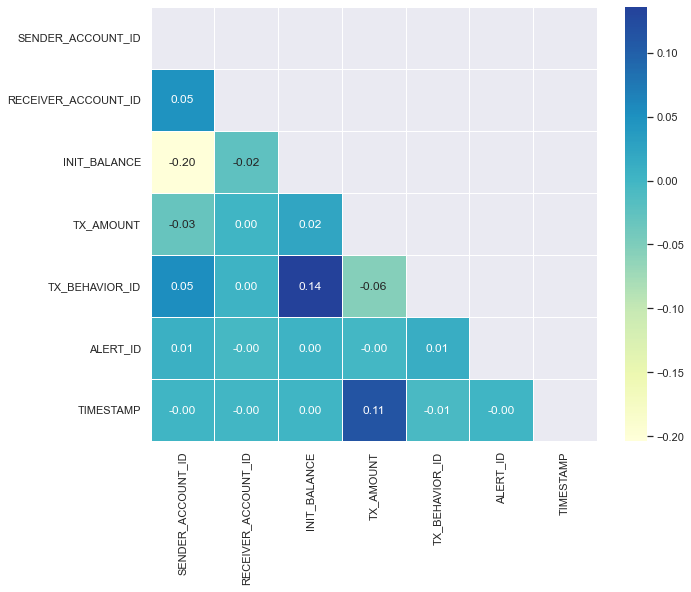

In [ ]:
# Create the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize= (10,8))
# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap='YlGnBu', center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

Features of correlation co-efficient of one or minus one bring no new information to a dataset but do add to the complexity. so naturally, we would want to drop one of the two features that hold the same information

### Visual EDA

/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


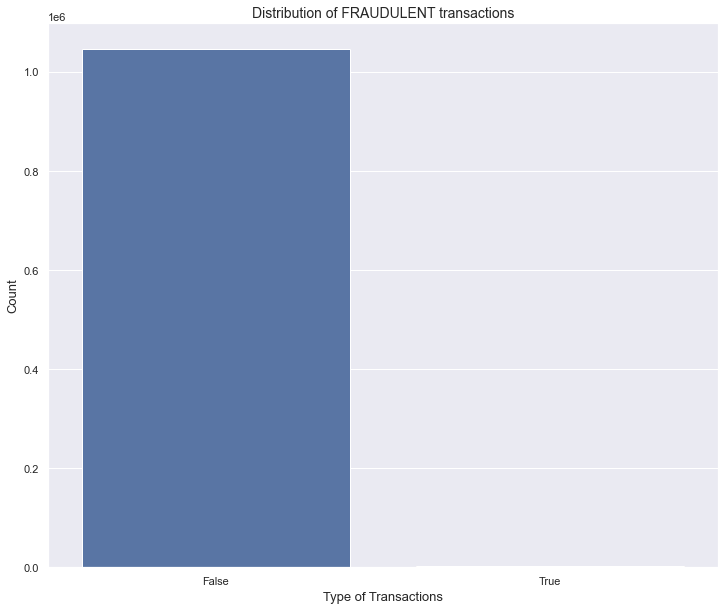

In [ ]:
plt.figure(figsize= (12, 10))
sns.countplot(df['IS_FRAUD'])
plt.title("Distribution of FRAUDULENT transactions", fontsize= 14)
plt.xlabel('Type of Transactions', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

As we see in above count plot, False class is too high in IS_FRAUD distribution

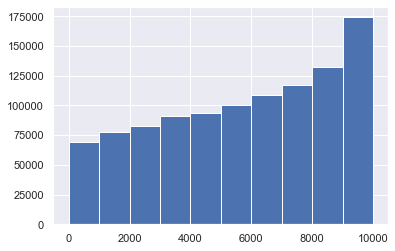

In [ ]:
df['SENDER_ACCOUNT_ID'].hist()
plt.show()

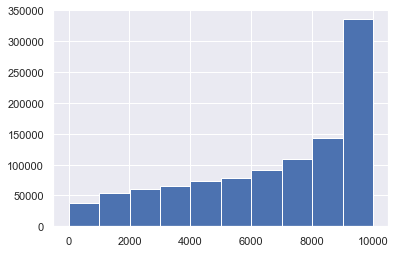

In [ ]:
df['RECEIVER_ACCOUNT_ID'].hist()
plt.show()

It is understood from the SENDER_ACCOUNT_ID, RECEIVER_ACCOUNT_ID histograms that many transactions transferred from or transferred to ACCOUNT_IDs more than 9000

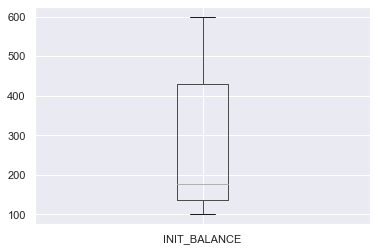

In [ ]:
df[['INIT_BALANCE']].boxplot()
plt.show()

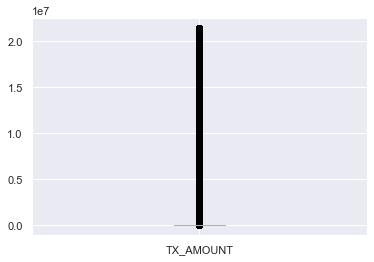

In [ ]:
df[['TX_AMOUNT']].boxplot()
plt.show()

There are no outliers present in INIT_BALANCE, but TX_AMOUNT has outliers. Notice more outliers are present in TX_AMOUNT attribute. For now, we will do model building considering outlier values

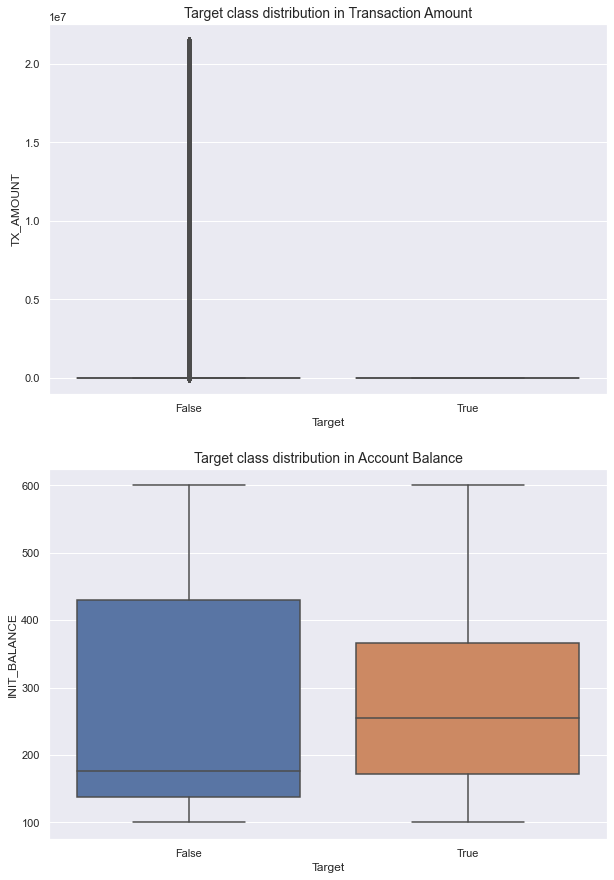

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10,15))
sns.boxplot(x='IS_FRAUD', y='TX_AMOUNT', data=df, ax=ax[0])
ax[0].set_xlabel('Target', fontsize=12)
ax[0].set_title('Target class distribution in Transaction Amount', fontsize=14)

sns.boxplot(x='IS_FRAUD', y='INIT_BALANCE', data=df, ax=ax[1])
ax[1].set_xlabel('Target', fontsize=12)
ax[1].set_title('Target class distribution in Account Balance', fontsize=14)

plt.show()

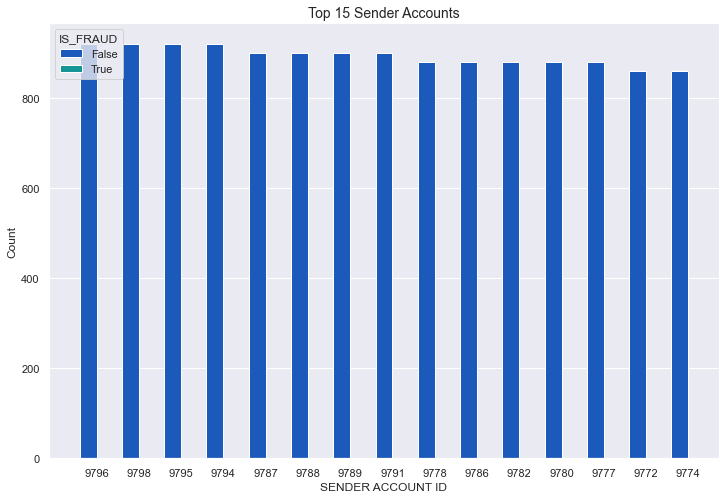

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='SENDER_ACCOUNT_ID', data=df, hue= 'IS_FRAUD', palette='winter', order=df.SENDER_ACCOUNT_ID.value_counts().iloc[:15].index)
plt.ylabel('Count', fontsize=12)
plt.xlabel('SENDER ACCOUNT ID', fontsize=12)
plt.title('Top 15 Sender Accounts', fontsize=14)
plt.axis('tight')

plt.show()

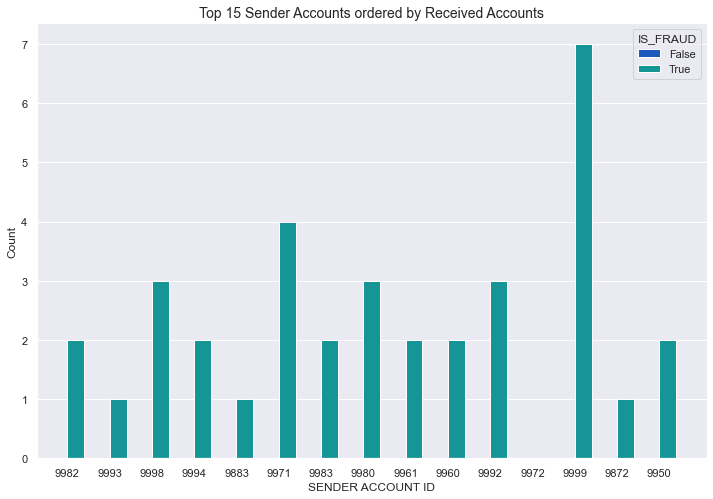

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='SENDER_ACCOUNT_ID', data=df, hue= 'IS_FRAUD', palette='winter', order=df.RECEIVER_ACCOUNT_ID.value_counts().iloc[:15].index)
plt.ylabel('Count', fontsize=12)
plt.xlabel('SENDER ACCOUNT ID', fontsize=12)
plt.title('Top 15 Sender Accounts ordered by Received Accounts', fontsize=14)
plt.axis('tight')

plt.show()

From our graph, we understood that Most Transactions transferred to 9999 are flagged as Fradulent transactions

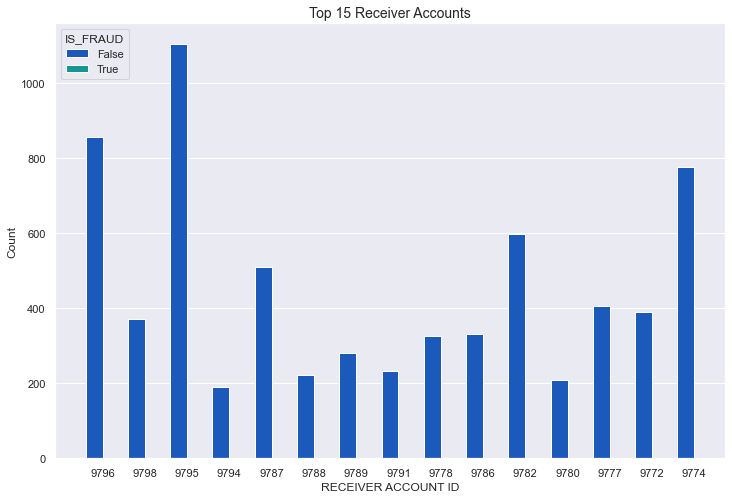

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='RECEIVER_ACCOUNT_ID', data=df, hue= 'IS_FRAUD', palette='winter', order=df.SENDER_ACCOUNT_ID.value_counts().iloc[:15].index)
plt.xlabel('RECEIVER ACCOUNT ID',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Top 15 Receiver Accounts', fontsize=14)
plt.axis('tight')

plt.show()

    From the above plots, it is also confirmed that most of the fradulent transactions are either sent from or received in ACCOUNT_IDs more than 9000. So, SENDER_ACCOUNT_ID and RECEIVER_ACCOUNT_ID one of the important features to consider for our modelling

## Feature Engineering

    * SENDER_ACCOUNT_ID and RECEIVER_ACCOUNT_ID are important factors based on our EDA. but, the values are  unique numbers. we will try perform Feature Engineering to create new column based on these existing columns
    * ALERT_ID have two -1 and all other IDs. we will do binarizing columns by keeping -1 as one category and all other IDs as another category.

#### 1. Binning values

    For many continuous values we care less about the exact value of a numeric column, but instead care about the bucket it falls into. This can be useful when plotting values, or simplifying our machine learning models. It is mostly used on continuous variables where accuracy is not the biggest concern e.g. age, height, wages. Binning values actually convert the resultant column as category type.

In [ ]:
# Specify the boundaries of the bins
bins = [-np.inf, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, np.inf]
#we are binning account_id less than 1000 in ‘Very Low’ so in order to do this we are using -np.inf(i.e. from –ve infinity till 10000 is ‘Very low’)
# Bin labels
#labels = ['<1000', '>1000', '<3000', '<4000', '<5000', '<6000', '<7000', '<8000', '>8000']
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9']

# Bin the continuous variable ConvertedSalary using these boundaries
df['senderaccts_binned'] = pd.cut(df['SENDER_ACCOUNT_ID'], 
                                         bins=bins, labels=labels)
df['receiveraccts_binned'] = pd.cut(df['RECEIVER_ACCOUNT_ID'], 
                                         bins=bins, labels=labels)

# Print the first 5 rows of the boundary_binned column
print(df[['SENDER_ACCOUNT_ID', 'senderaccts_binned', 'RECEIVER_ACCOUNT_ID', 'receiveraccts_binned']].tail(10))


         SENDER_ACCOUNT_ID senderaccts_binned  RECEIVER_ACCOUNT_ID  \
1046917               9998                  9                 6603   
1046918               9998                  9                 7126   
1046919               9998                  9                 9698   
1046920               9999                  9                  810   
1046921               9999                  9                 4311   
1046922               9999                  9                 5351   
1046923               9999                  9                 6343   
1046924               9999                  9                 7095   
1046925               9999                  9                 8767   
1046926               9999                  9                 9530   

        receiveraccts_binned  
1046917                    7  
1046918                    8  
1046919                    9  
1046920                    1  
1046921                    5  
1046922                    6  
1046923     

#### 2. Binarizing columns
    While numeric values can often be used without any feature engineering, there will be cases when some form of manipulation can be useful. For example on some occasions, you might not care about the magnitude of a value but only care about its direction, or if it exists at all.

In [ ]:
#ALERT_ID is the column which this transaction is involved in(i.e. If the transaction is not involved in any alerts, the value is -1)
# if ALERT_ID is -1(FALSE) then 0 otherwise 1

df['Alerts'] = 0 
df.loc[df['ALERT_ID'] > -1, 'Alerts'] = 1

In [ ]:
df.head()

,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,INIT_BALANCE,TX_AMOUNT,TX_BEHAVIOR_ID,ALERT_ID,TIMESTAMP,IS_FRAUD,senderaccts_binned,receiveraccts_binned,Alerts
0,1,884,175.8,175.8,1,-1,6.0,False,1,1,0
1,1,884,175.8,175.8,1,-1,19.0,False,1,1,0
2,1,884,175.8,175.8,1,-1,38.0,False,1,1,0
3,1,884,175.8,175.8,1,-1,48.0,False,1,1,0
4,1,884,175.8,175.8,1,-1,55.0,False,1,1,0


In [ ]:
#df['TIMESTAMP'].nunique()

In [ ]:
df.shape

(1046927, 11)

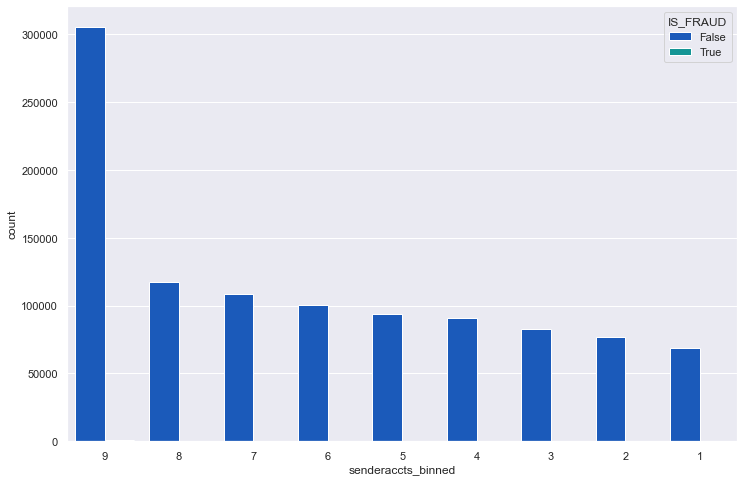

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='senderaccts_binned', data=df, hue= 'IS_FRAUD', palette='winter', order=df.senderaccts_binned.value_counts().iloc[:15].index)

plt.show()

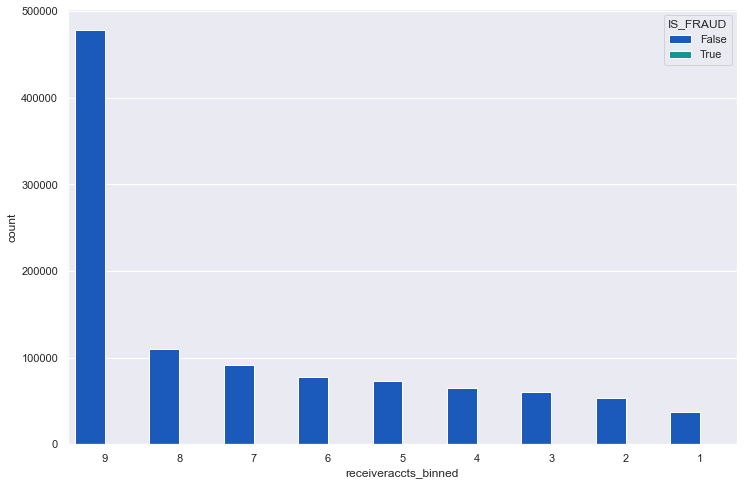

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='receiveraccts_binned', data=df, hue= 'IS_FRAUD', palette='winter', order=df.receiveraccts_binned.value_counts().iloc[:15].index)

plt.show()

## Feature Extraction

Creating new features as a combination of existing features thereby losing very less information from the dataset compared to Feature selection

In [ ]:
df['perc_spendings']= round(((df['INIT_BALANCE'] - df['TX_AMOUNT']) / df['INIT_BALANCE']) * 100,2)

df[['INIT_BALANCE','TX_AMOUNT','perc_spendings']].head()

,INIT_BALANCE,TX_AMOUNT,perc_spendings
0,175.8,175.8,0.0
1,175.8,175.8,0.0
2,175.8,175.8,0.0
3,175.8,175.8,0.0
4,175.8,175.8,0.0


In [ ]:
print(df['perc_spendings'].nunique())
df['perc_spendings'].unique()

32381


array([0.000e+00, 1.000e-02, 5.000e+01, ..., 9.493e+01, 9.836e+01,
       9.388e+01])

In [ ]:
df['perc_spendings'].describe()

count    1.046927e+06
mean    -4.230457e+04
std      4.789978e+05
min     -1.071856e+07
25%      0.000000e+00
50%      0.000000e+00
75%      8.571000e+01
max      1.000000e+02
Name: perc_spendings, dtype: float64

In [ ]:
df[(df["perc_spendings"] > 80.00)]

,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,INIT_BALANCE,TX_AMOUNT,TX_BEHAVIOR_ID,ALERT_ID,TIMESTAMP,IS_FRAUD,senderaccts_binned,receiveraccts_binned,Alerts,perc_spendings
1906,49,2910,196.75,4.21,1,84,84.0,True,1,3,1,97.86
2813,67,7824,138.49,3.08,1,18,155.0,True,1,8,1,97.78
3891,86,5933,181.16,4.18,1,58,61.0,True,1,6,1,97.69
6895,138,9197,135.03,4.59,1,123,28.0,True,1,9,1,96.60
7742,153,9984,167.62,3.06,1,152,87.0,True,1,9,1,98.17
...,...,...,...,...,...,...,...,...,...,...,...,...
1046922,9999,5351,317.65,10.35,5,223,186.0,True,9,6,1,96.74
1046923,9999,6343,317.65,19.23,5,285,186.0,True,9,7,1,93.95
1046924,9999,7095,317.65,11.85,5,260,13.0,True,9,8,1,96.27
1046925,9999,8767,317.65,4.28,5,154,74.0,True,9,9,1,98.65


Looks like most of transactions with spending more than 80% of their INIT_BALANCE are given more attention to detect fraudulent. prec_spendings is another important feature to be considered for our modelling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046927 entries, 0 to 1046926
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   SENDER_ACCOUNT_ID     1046927 non-null  int64   
 1   RECEIVER_ACCOUNT_ID   1046927 non-null  int64   
 2   INIT_BALANCE          1046927 non-null  float64 
 3   TX_AMOUNT             1046927 non-null  float64 
 4   TX_BEHAVIOR_ID        1046927 non-null  int64   
 5   ALERT_ID              1046927 non-null  int64   
 6   TIMESTAMP             1046927 non-null  float64 
 7   IS_FRAUD              1046927 non-null  category
 8   senderaccts_binned    1046927 non-null  category
 9   receiveraccts_binned  1046927 non-null  category
 10  Alerts                1046927 non-null  int64   
 11  perc_spendings        1046927 non-null  float64 
dtypes: category(3), float64(4), int64(5)
memory usage: 74.9 MB


In [ ]:
#sns.pairplot(df, hue='IS_FRAUD', diag_kind='hist')
#plt.show()

#### Correlation is performed again on columns post Feature Engineering

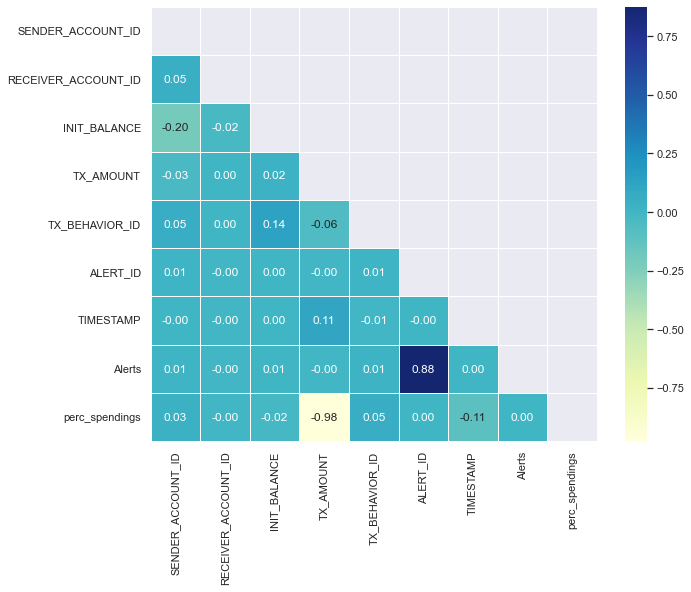

In [ ]:
# Create the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize= (10,8))
# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap='YlGnBu', center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [ ]:
#split the dataset into independent and dependent variable

#cols_to_model = ['INIT_BALANCE', 'TX_AMOUNT','TX_BEHAVIOR_ID', 'senderaccts_binned','receiveraccts_binned', 'Alerts','IS_FRAUD']
cols_to_model = ['TX_BEHAVIOR_ID', 'senderaccts_binned', 'receiveraccts_binned','Alerts', 'INIT_BALANCE','TIMESTAMP','perc_spendings','IS_FRAUD']

print(cols_to_model, len(cols_to_model))

df1= df[cols_to_model]

['TX_BEHAVIOR_ID', 'senderaccts_binned', 'receiveraccts_binned', 'Alerts', 'INIT_BALANCE', 'TIMESTAMP', 'perc_spendings', 'IS_FRAUD'] 8


In [ ]:
df1.head()

,TX_BEHAVIOR_ID,senderaccts_binned,receiveraccts_binned,Alerts,INIT_BALANCE,TIMESTAMP,perc_spendings,IS_FRAUD
0,1,1,1,0,175.8,6.0,0.0,False
1,1,1,1,0,175.8,19.0,0.0,False
2,1,1,1,0,175.8,38.0,0.0,False
3,1,1,1,0,175.8,48.0,0.0,False
4,1,1,1,0,175.8,55.0,0.0,False


In [ ]:
# Since most of our data has already been scaled we should scale the columns that are left to scale
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

#std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df1['scaled_balance'] = rob_scaler.fit_transform(df1['INIT_BALANCE'].values.reshape(-1,1))
df1['scaled_ts'] = rob_scaler.fit_transform(df1['TIMESTAMP'].values.reshape(-1,1))

df1.drop(['INIT_BALANCE','TIMESTAMP'], axis=1, inplace=True)

/tmp/ipykernel_51411/531704307.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['scaled_balance'] = rob_scaler.fit_transform(df1['INIT_BALANCE'].values.reshape(-1,1))
/tmp/ipykernel_51411/531704307.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['scaled_ts'] = rob_scaler.fit_transform(df1['TIMESTAMP'].values.reshape(-1,1))
/opt/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

In [ ]:
scaled_balance = df1['scaled_balance']
scaled_ts= df1['scaled_ts']

df1.drop(['scaled_balance', 'scaled_ts'], axis=1, inplace=True)
df1.insert(0, 'scaled_balance', scaled_balance)
df1.insert(1, 'scaled_ts', scaled_balance)

# Amount and Time are Scaled!

df1.head()

,scaled_balance,scaled_ts,TX_BEHAVIOR_ID,senderaccts_binned,receiveraccts_binned,Alerts,perc_spendings,IS_FRAUD
0,-0.000959,-0.000959,1,1,1,0,0.0,False
1,-0.000959,-0.000959,1,1,1,0,0.0,False
2,-0.000959,-0.000959,1,1,1,0,0.0,False
3,-0.000959,-0.000959,1,1,1,0,0.0,False
4,-0.000959,-0.000959,1,1,1,0,0.0,False


In [ ]:
df1.isnull().sum()

scaled_balance          0
scaled_ts               0
TX_BEHAVIOR_ID          0
senderaccts_binned      0
receiveraccts_binned    0
Alerts                  0
perc_spendings          0
IS_FRAUD                0
dtype: int64

## Model Building

#### Extracting X as all columns except the IS_FRAUD column and Y as IS_FRAUD

In [ ]:
y=df1['IS_FRAUD']
X= df1.drop('IS_FRAUD', axis=1)
#y= df1.iloc[:,-1]
#X= df1.iloc[:,0:8].values

y

0          False
1          False
2          False
3          False
4          False
           ...  
1046922     True
1046923     True
1046924     True
1046925     True
1046926     True
Name: IS_FRAUD, Length: 1046927, dtype: category
Categories (2, object): [False, True]

In [ ]:
#Encode target class into numerical values
le= LabelEncoder()

y= le.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=1112)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(785195, 7) (261732, 7) (785195,) (261732,)


## Model 1: Logistic Regression

In [ ]:
#instantiate LogisticRegression Classifier

lr = LogisticRegression(C=0.01, solver='liblinear', random_state=99) 
# C= Regularization strength to avoid Overfitting. smaller values specify stronger regularization 
# Other solvers have failure to converge problem

### Cross Validation

In [ ]:
# Compute 5-fold cross-validation scores: cv_scores
cv_scores= cross_val_score(lr, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.9999809  0.9983571  0.99836187 0.99835709 0.99835709]
Average 5-Fold CV Score: 0.9986828107667716


In [ ]:
#fit the training set to model
lr.fit(X_train, y_train)

#Check Training and Test Set Accuracy

training_accuracy= lr.score(X_train, y_train)
test_accuracy= lr.score(X_test, y_test)

print(f"Training Set accuracy = {training_accuracy}")
print(f"Test Set accuracy = {test_accuracy}")

Training Set accuracy = 0.999230764332427
Test Set accuracy = 0.9992549630920178


### Model Evaluation

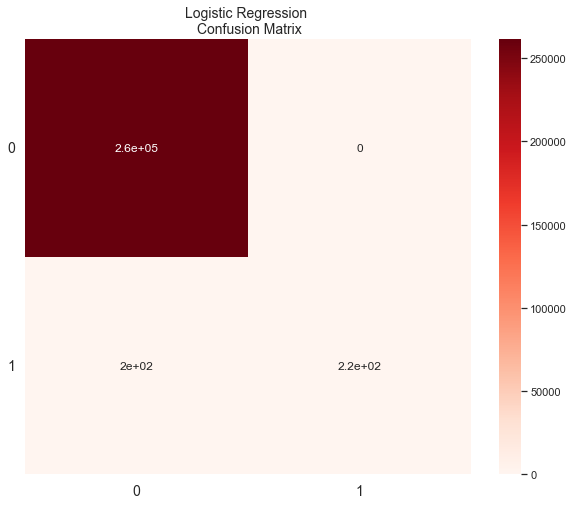

In [ ]:
# Confusion matrix
cm= confusion_matrix(y_test, lr.predict(X_test))

plt.figure(figsize= (10,8))
sns.heatmap(cm, annot=True, cmap=plt.cm.Reds)
plt.title("Logistic Regression \n Confusion Matrix", fontsize=14)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=360)

plt.show()

In [ ]:
labels = ['No Fraud', 'Fraud']

# Complete classification report
print(classification_report(y_test,lr.predict(X_test),target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00    261315
       Fraud       1.00      0.53      0.69       417

    accuracy                           1.00    261732
   macro avg       1.00      0.77      0.85    261732
weighted avg       1.00      1.00      1.00    261732



<li> In a dataset with highly unbalanced classes, the classifier will always “predicts” the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one. Our model have bias towards majority class as they tend to ignore the minority class. Our minority class has negligible or very lesser recall because we have imbalanced data distribution in our dataset </li>

#### Recall is the proportion of actual positive cases which are correctly identified

## Model 2: Logistic Regression with Stratified sampling

    It is technique to be used of imbalance distribution of data

In [ ]:
X_train_sf, X_test_sf, y_train_sf, y_test_sf= train_test_split(X, y, test_size=0.25, random_state= 1112, 
                                                               stratify= y)

#stratify parameter makes sures that each set contains approximately the same percentage of samples of each target class as the complete set

print(X_train_sf.shape, X_test_sf.shape, y_train_sf.shape, y_test_sf.shape)

(785195, 7) (261732, 7) (785195,) (261732,)


In [ ]:
lr = LogisticRegression(C=0.01, solver='liblinear', random_state=99) 

#fit the training set to model
lr.fit(X_train_sf, y_train_sf)

#Check Training and Test Set Accuracy

training_accuracy_sf= lr.score(X_train_sf, y_train_sf)
test_accuracy_sf= lr.score(X_test_sf, y_test_sf)

print(f"Training Set accuracy = {training_accuracy_sf}")
print(f"Test Set accuracy = {test_accuracy_sf}")

Training Set accuracy = 0.999232037901413
Test Set accuracy = 0.9992435009857411


In [ ]:
# Complete classification report
labels = ['No Fraud', 'Fraud']

print(classification_report(y_test_sf,lr.predict(X_test_sf),target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00    261302
       Fraud       1.00      0.54      0.70       430

    accuracy                           1.00    261732
   macro avg       1.00      0.77      0.85    261732
weighted avg       1.00      1.00      1.00    261732



### Model Evaluation

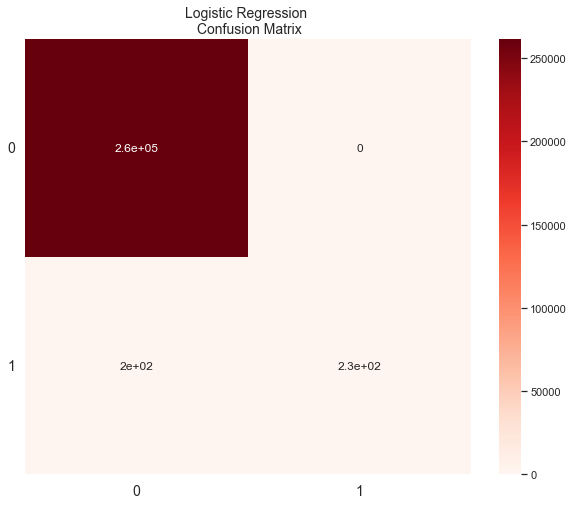

In [ ]:
# Confusion matrix
cm_sf= confusion_matrix(y_test_sf, lr.predict(X_test_sf))

plt.figure(figsize= (10,8))
sns.heatmap(cm_sf, annot=True, cmap=plt.cm.Reds)
plt.title("Logistic Regression \n Confusion Matrix", fontsize=14)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=360)

plt.show()

##### This model is better than the first model because it classifies better and also the recall value of minority class is increased to 54 %

## HyperParameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_lr= {'C': [0.01, 0.1, 1]}

#Instantiate grid_lr
grid_lr= GridSearchCV(lr, param_grid=param_lr, cv=5, scoring='recall')

In [ ]:
grid_lr.fit(X_train_sf, y_train_sf)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=0.01, random_state=99,
                                          solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1]}, scoring='recall')

In [ ]:
# Report the best parameters and the corresponding score
print("Best CV params", grid_lr.best_params_)
print("Best CV recall", grid_lr.best_score_)
# Report the test accuracy using these best parameters
print("Test Recall of best grid search hypers:", grid_lr.score(X_test_sf,y_test_sf))

Best CV params {'C': 1}
Best CV recall 0.8557656923958616
Test Recall of best grid search hypers: 1.0


In [ ]:
predictions_grid= grid_lr.predict(X_test_sf)

### Model Evaluation

In [ ]:
labels = ['No Fraud', 'Fraud']

print(classification_report(y_test_sf,predictions_grid,target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00    261302
       Fraud       1.00      1.00      1.00       430

    accuracy                           1.00    261732
   macro avg       1.00      1.00      1.00    261732
weighted avg       1.00      1.00      1.00    261732



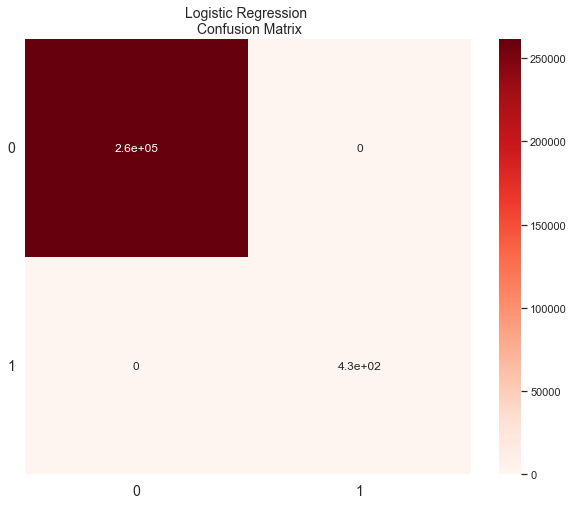

In [ ]:
# Confusion matrix
cm_gs= confusion_matrix(y_test_sf, predictions_grid, )

plt.figure(figsize= (10,8))
sns.heatmap(cm_gs, annot=True, cmap=plt.cm.Reds)
plt.title("Logistic Regression \n Confusion Matrix", fontsize=14)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=360)

plt.show()

### Setting Parameter C=1 during fitting our training data to our Logistic regression model increases our recall score from 54% to 100%

## Model Comparison

    Fit our Training and Test set to other Classification models and Evaluating Model performance

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

dt= DecisionTreeClassifier()
rf= RandomForestClassifier(oob_score=True, n_estimators=100)
#oob_score= True is to use out-of-bag samples to estimate the generalization score

kn= KNeighborsClassifier()

gbr= GradientBoostingClassifier()
svm= SVC(kernel='linear')

In [ ]:
# Other models fitted

dt.fit(X_train_sf, y_train_sf)
rf.fit(X_train_sf, y_train_sf)
kn.fit(X_train_sf, y_train_sf)
gbr.fit(X_train_sf, y_train_sf)
#svm.fit(X_train_sf, y_train_sf)

GradientBoostingClassifier()

In [ ]:
# predicting Target labels
y_pred_dt = dt.predict(X_test_sf)
y_pred_rf = rf.predict(X_test_sf)
y_pred_kn = kn.predict(X_test_sf)
y_pred_gbr = gbr.predict(X_test_sf)
#y_pred_svm = svm.predict(X_test_sf)

### Model Evaluation

In [ ]:
labels = ['No Fraud', 'Fraud']

print('Decision Tree:')
print(classification_report(y_test_sf,y_pred_dt, target_names=labels))

print('KNears Neighbors:')
print(classification_report(y_test_sf, y_pred_kn, target_names=labels))

print('Random Forest Classifier:')
print(classification_report(y_test_sf, y_pred_rf, target_names=labels))

print('Gradient Boost Classifier:')
print(classification_report(y_test_sf, y_pred_gbr, target_names=labels))

#print('Linear SVC:')
#print(classification_report(y_test_sf, y_pred_svm, target_names=labels))

Decision Tree:
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00    261302
       Fraud       1.00      1.00      1.00       430

    accuracy                           1.00    261732
   macro avg       1.00      1.00      1.00    261732
weighted avg       1.00      1.00      1.00    261732

KNears Neighbors:
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00    261302
       Fraud       0.99      0.96      0.97       430

    accuracy                           1.00    261732
   macro avg       0.99      0.98      0.99    261732
weighted avg       1.00      1.00      1.00    261732

Random Forest Classifier:
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00    261302
       Fraud       1.00      1.00      1.00       430

    accuracy                           1.00    261732
   macro avg       1.00      1.00      1.00    261732
weighted avg   

## Conclusion:


##### Different models perform better on given dataset. Tree Based model always performs better on imbalanced Dataset
##### As we got imbalanced dataset, Metrics like Accuracy score is not effective evaluation parameter to our models. 
##### We started with traditional Logistic Regression and with little help from HyperParameter Tuning, we are able to achieve Acceptable Recall score. 
##### Now we can use any of Tree based model or Logistic Regression Model to predict upcoming new transactions.